In [1]:
pwd

'C:\\Users\\Pravin Roy'

In [5]:
cd F:\ML Work\Dataset\Assignment

F:\ML Work\Dataset\Assignment


In [13]:
pwd

'F:\\ML Work\\Dataset\\Assignment'

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import random
import gc
from PIL import Image
#print(os.listdir("../Assignment/train/defect"))

In [2]:
DIR_HEALTHY = '/Users/Prasenjit/Desktop/Capstone Project/Fender/train/healthy/'
DIR_CRACK = '/Users/Prasenjit/Desktop/Capstone Project/Fender/train/defect/'

In [3]:
IMG_SIZE = 100

def load_and_process_data():
    train_data = []
    label_data = []
    for img in os.listdir(DIR_HEALTHY):
        label = 1
        if img.split('.')[-1] == 'jpg':
            path = os.path.join(DIR_HEALTHY, img)
            img = Image.open(path)
            #img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            train_data.append(np.array(img))
            label_data.append(label)
    
    for img in os.listdir(DIR_CRACK):
        label = 0
        if img.split('.')[-1] == 'jpg':
            path = os.path.join(DIR_CRACK, img)
            img = Image.open(path)
            #img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            train_data.append(np.array(img))
            label_data.append(label)
    

    random.shuffle(train_data)
    return (train_data, label_data)

In [4]:
train_data, label_data = load_and_process_data()

In [5]:
train_data[0]

array([[[ 94,  74, 132],
        [ 94,  75, 131],
        [ 94,  76, 136],
        ...,
        [104,  84, 148],
        [104,  85, 148],
        [101,  83, 142]],

       [[ 95,  76, 134],
        [ 96,  77, 136],
        [ 97,  77, 137],
        ...,
        [108,  87, 151],
        [107,  86, 149],
        [103,  84, 145]],

       [[ 93,  75, 132],
        [ 96,  77, 137],
        [ 97,  78, 139],
        ...,
        [110,  88, 152],
        [106,  86, 150],
        [104,  85, 148]],

       ...,

       [[ 83,  66, 118],
        [ 84,  67, 120],
        [ 86,  68, 121],
        ...,
        [104,  84, 145],
        [103,  84, 143],
        [105,  86, 141]],

       [[ 82,  65, 117],
        [ 84,  67, 120],
        [ 85,  68, 121],
        ...,
        [104,  85, 143],
        [106,  85, 143],
        [102,  84, 135]],

       [[ 82,  65, 118],
        [ 84,  66, 119],
        [ 84,  67, 120],
        ...,
        [103,  84, 141],
        [ 98,  80, 132],
        [ 74,  68,  90]]

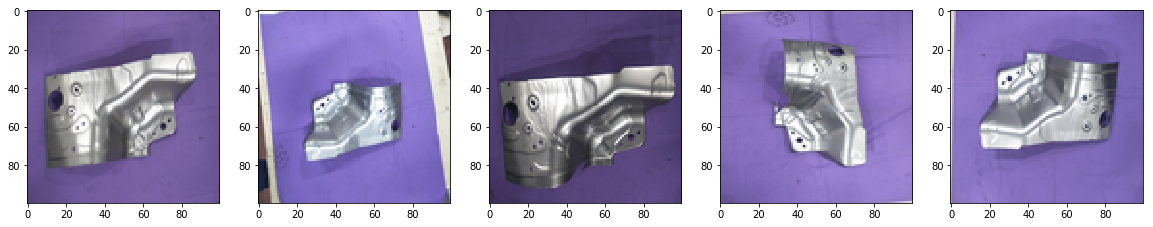

In [6]:
plt.figure(figsize=(20,10))
columns=5
for i in range(columns):
    plt.subplot(5/columns+1 ,columns, i+1)
    plt.imshow(train_data[i])

In [7]:
len(train_data)
len(label_data)
train_data[0].shape

(100, 100, 3)

In [8]:
train_data = np.array(train_data)
train_data = train_data/255.0

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_value,Y_train,Y_value=train_test_split(train_data,label_data,test_size=0.2,random_state=2)

print('Shape of train image: ',X_train.shape)
print('Shape of validation image: ',X_value.shape)
print('Shape of label: ',len(Y_train))
print('Shape of label: ',len(Y_value))

Shape of train image:  (200, 100, 100, 3)
Shape of validation image:  (50, 100, 100, 3)
Shape of label:  200
Shape of label:  50


In [10]:
from keras import *

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3) ,activation='relu',input_shape=(100,100,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3) ,activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3) ,activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3) ,activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          9248      
__________

In [11]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])
batch_size=32

from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
val_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
train_generator=train_datagen.flow(X_train,Y_train,batch_size=batch_size)
val_generator=val_datagen.flow(X_train,Y_train,batch_size=batch_size)

In [17]:
ntrain = len(X_train)
nval = len(X_value)

In [18]:
history=model.fit_generator(train_generator,steps_per_epoch=ntrain//batch_size,epochs=64,validation_data=val_generator,validation_steps=nval//batch_size)

Epoch 1/64
6/6 [==============================] - 4s 616ms/step - loss: 0.6929 - acc: 0.6118 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/64
6/6 [==============================] - 3s 519ms/step - loss: 0.6924 - acc: 0.5665 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 3/64
6/6 [==============================] - 3s 573ms/step - loss: 0.6918 - acc: 0.5625 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 4/64
6/6 [==============================] - 3s 527ms/step - loss: 0.6909 - acc: 0.5612 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 5/64
6/6 [==============================] - 3s 486ms/step - loss: 0.6935 - acc: 0.5169 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 6/64
6/6 [==============================] - 4s 596ms/step - loss: 0.6891 - acc: 0.5833 - val_loss: 0.6937 - val_acc: 0.5000
Epoch 7/64
6/6 [==============================] - 3s 530ms/step - loss: 0.6886 - acc: 0.5665 - val_loss: 0.6941 - val_acc: 0.5000
Epoch 8/64
6/6 [==============================] - 3s 499ms/step - loss: 0.6904 - acc: 0.54

Epoch 64/64
6/6 [==============================] - 8s 1s/step - loss: 0.6910 - acc: 0.5476 - val_loss: 0.7009 - val_acc: 0.5000


In [19]:
model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')

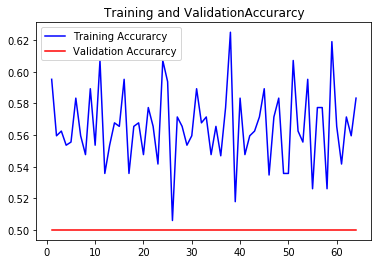

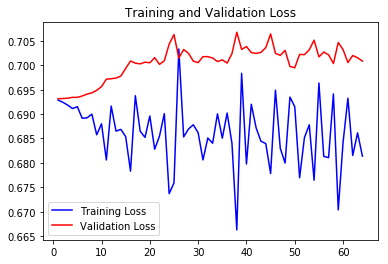

In [20]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
#Train And Validation Accurarcy
plt.plot(epochs , acc,'b',label='Training Accurarcy')
plt.plot(epochs,val_acc,'r',label='Validation Accurarcy')
plt.title('Training and ValidationAccurarcy')
plt.legend()

plt.figure()

#Train And Validation Loss

plt.plot(epochs , loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
TEST_DIR='F:/ML Work/Dataset/Assignment/test/'

